# Workshop: Neural Nets in TensorFlow

### Monday, May 1 and Wednesday May 3

Today's exercises will introduce the basics of neural nets in tensorflow.

We'll focus in today's exercises on the basics of neural net structure. Then, in Wednesday's exercises, we'll walk through the process of building and training a more complicated neural net.

<b>Reminder:</b> if you have not already installed TensorFlow on your local machine, do so with `pip install tensorflow`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__) # Make sure you have TF version 2.X


## Structure of a single neuron

A neuron in a neural net takes a vector $X \in \mathbb{R}^d$ as input and produces a scalar as output.
Specifically, it produces the output
$$
\sigma( W^T X + b ).
$$
Here, $W \in \mathbb{R}^{d}$ and $b \in \mathbb{R}$, so $W^T X + b$ is just a linear (okay, technically affine!) function of our data.
If that's all we had, then neural nets would just be big complicated linear regression models.
The secret sauce is the <b>activation function</b> $\sigma : \mathbb{R} \rightarrow \mathbb{R}$.
We choose this activation function to be non-linear (again, if it were linear, we would just be training a big, overly-complicated linear regression model), typically either a rectified linear unit (ReLU, https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) or sigmoid (https://en.wikipedia.org/wiki/Sigmoid_function).

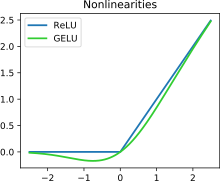

Here's a sigmoid function:

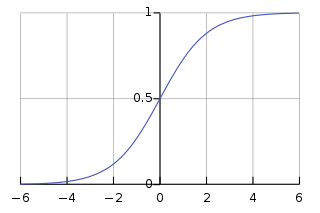

In our small example last week, we used a ReLU, and that tends to be the most common choice in most models, but it's not the only option!

Let's take a few minutes to play around with a neuron simulator and look at the different behaviors we can get by including different non-linearities in our model (this uses a sigmoid function for the activation): https://playground.tensorflow.org/#activation=sigmoid&regularization=L2&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.0001&regularizationRate=0&noise=0&networkShape=&seed=0.55381&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=true&learningRate_hide=true&regularizationRate_hide=true&percTrainData_hide=true&numHiddenLayers_hide=true&discretize_hide=true&activation_hide=true&problem_hide=true&noise_hide=true&regularization_hide=true&dataset_hide=true&batchSize_hide=true&playButton_hide=false

Of course, a neural net involves lots of these neurons (called <i>units</i>), configured together.
Here's a diagram:

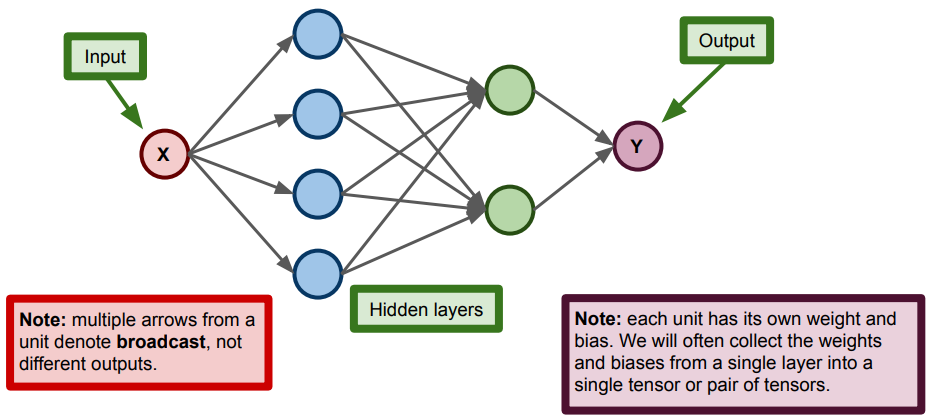

An important point about neural nets is that they free us from the constraints of linear models. Specifically, they let us learn classification boundaries more complicated than simple hyperplanes (okay, to be clear, neural nets are not the only way to do this; see, e.g., the kernel trick; but neural nets are certainly a nice solution).

For example, consider the following data. A simple linear model (or even a non-linear activation function applied to a linear function) will have a hard time fitting this data (if it is possible at all).

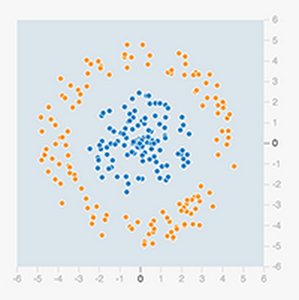

On the other hand, a fairly simple neural net can be made to learn this boundary quite easily.
Let's try it out for ourselves here: https://playground.tensorflow.org/#activation=sigmoid&regularization=L2&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3&seed=0.84062&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=true&learningRate_hide=true&regularizationRate_hide=true&percTrainData_hide=true&numHiddenLayers_hide=true&discretize_hide=true&activation_hide=true&problem_hide=true&noise_hide=true&regularization_hide=true&dataset_hide=true&batchSize_hide=true&playButton_hide=false

If you're interested, this tutorial will walk you through some of the details of what's going on under the hood when neural nets learn these kinds of decision boundaries (and shows an even more crazy example at the end): https://cloud.google.com/blog/products/ai-machine-learning/understanding-neural-networks-with-tensorflow-playground

## Building a model of our own

In the lecture videos, we saw an example of building a convolutional neural net (CNN) for classifying the MNIST data.
We'll walk through the details of that model on Wednesday.
As warmup for that, we'll build a couple of simpler models, tracing the history of neural nets in the process.

### Perceptrons: The original neural net

The perceptron was first developed in 1958 by Frank Rosenblatt (https://en.wikipedia.org/wiki/Perceptron). Here's what it looked like:

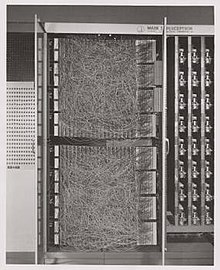

Dang, that's a lot of wires.
The next time you're complaining about how hard it is to get your code working, think about poor Frank Rosenblatt and his grad students wiring this thing up...

Given an input $x \in \mathbb{R}^d$, the perceptron produces a binary output (typically a label) according to

$$
f(x) = \begin{cases} 1 &\mbox{ if } w^T x + b \ge 0 \\
                0 &\mbox{ otherwise, } \end{cases}
$$

where $w \in \mathbb{R}^d$ and $b \in \mathbb{R}$.
This should look pretty familiar by now.

The perceptron consists of a single unit, with activation function $1\{z \ge 0\}$.
It's a very simple model, and accordingly, it can only learn very simple decision boundaries: hyperplanes.

There's one problem-- if our model outputs booleans, then our loss function is not going to be differentiable (meditate on this fact to convince yourself!).
So instead of outputting a Boolean $f(x)$, our model is going to produce a smoothed version of this:
$$
\sigma( w^T X_i + b ),
$$
where $\sigma(z) = 1/(1+\exp\{-z\})$, the sigmoid function.

Okay, this is secretly just logistic regression, now, but just play along!

Let's build a perceptron. Implement the `__init__` and `__call__` methods for the following class. The initialization method should take a single optional `dim` argument to specify the data dimension, and should initialize the `w` and `b` parameters according to independent standard normals.

<b>Hint:</b> the sigmoid function is available in `tf.math.sigmoid`.

Note that we are now using the `Model` class from Keras instead of the `Module` class.

In [ ]:
from tensorflow.keras import Model

class Perceptron(Model):
    def __init__(self, dim=1):
        pass
    def __call__(self, x, training=False):
        pass

In [ ]:
perc = Perceptron( dim=3 )
X = tf.random.normal((10,3))
# Applying this 3-dimensional Perceptron to this 3-D data
# should result in one output per data point, i.e., 10 outputs.
perc( X )

Okay, now let's train this model. We're going to assume that the data points take the form $(X,Y)$ where $X$ is a vector and $Y$ is a Boolean.

If our model produced Boolean outputs, we could use (forgive the odd notation!)
$$
L = \frac{1}{n} \sum_{i=1}^n \left\{ Y_i \neq 1\{w^T X_i + b \ge 0\}  \right\},
$$
the fraction of points that we mislabel.

But as we noted above, this loss function is not differentiable!
So let's settle for something almost as good,
$$
L = \frac{1}{n} \sum_{i=1}^n (\sigma( w^T X_i + b ) - Y_i )^2.
$$
Of course, it is more common to consider a cross-entropy loss for training logistic regression, but let's keep things interesting.

Implement this loss as a function `perceploss( ytrue, ypred )`.
Don't forget that `ytrue` will be a Boolean tensor.
You can cast it to float with `tf.cast( ytrue, dtype=tf.float32 )`.

In [ ]:
def perceploss( ytrue, ypred ):
    pass

Here's some data that actually comes from a model that the perceptron can learn:

In [ ]:
def generate_perceptron_data( n, w, b ):
    dim = w.shape[0]
    X = tf.random.normal( (n, dim) )
    Y = X@w + b >= 0
    return (X, Y)

wtrue = tf.constant( [[1.5],[-0.5],[1],[-1]], dtype=tf.float32 )
btrue = tf.constant( [[3.1415]], dtype=tf.float32 )
n = 1000
(X,Y) = generate_perceptron_data( n, wtrue, btrue )

Okay, now let's use our same recipe from our last couple of exercises to train this model.

We've done this enough by now that I won't make you implement it again.

In [ ]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as t:
        current_loss = perceploss(y, model(x))
    
    (dw, db) = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub( learning_rate*dw )
    model.b.assign_sub( learning_rate*db )

In [ ]:
perc = Perceptron(X.shape[1])

nstep=2000
losses = list(range(nstep))
for i in range(nstep):
    train(perc, X, Y, learning_rate=0.1)
    losses[i] = perceploss(Y, perc(X))

plt.xlabel('step'); plt.ylabel('loss'); _ = plt.plot(losses)

More importantly, if we use our model's output to make predictions, what fraction of the points do we get wrong?

In [ ]:
predicted_labels = tf.cast( tf.math.round( perc(X) ), tf.bool )#perc(X) outputs numbers between 0 and 1; round them.

tf.reduce_mean( tf.cast( Y==predicted_labels, tf.float32 )) 

What about test data?

Adapt the code above to

1. Generate 200 new (X,Y) data points from the same underlying data distribution
2. Apply our trained model to the predictors
3. Adapt the code in the previous block to compute the accuracy of our model on the test data.

In [ ]:
# TODO: code goes here.

### Casting a wider net: multilayer perceptrons

The fact that the perceptron (and related linear models) can only learn hyperplane decision boundaries limits their utility for most complicated machine learning problems.

The simplest way to solve this problem is to wire a bunch of perceptrons together.
That's the idea behind the multilayer perceptron (MLP; https://en.wikipedia.org/wiki/Multilayer_perceptron).

The simplest MLP consists of three layers (collections of units):

1. the input (yes, this counts as a layer, and yes I find this convention annoying, too)
2. the hidden layer
3. the output

The input (i.e., the vector of predictors) gets broadcast to each neuron in the hidden layer,
these hidden layer neurons each apply their weights followed by activation, and pass their outputs to the output node,
which applies a final linear function followed by an activation.

But this leaves the question of how we actually build this model.
We <i>could</i>, in principle, wire together a bunch of instances of our `Perceptron` class above, but that would get tricky rather fast.

This is where some of the tools in TensorFlow and Keras become especially helpful.

Particularly helpful for us in the context of neural nets is the `keras.Sequential` class.

Quoting from the documentation (https://www.tensorflow.org/guide/keras/sequential_model), "A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor."
That is, this class lets us specify a <i>sequence</i> (hence the "sequential" name) of layers of neurons, in which each neuron in each layer broadcasts its output to every neuron in the next layer.

Again, the picture to have in your head is something like this:

![nn_diagram-2.png](attachment:nn_diagram-2.png)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define Sequential model with 3 layers
model = tf.keras.Sequential(
    [ # Note: the numerical argument to layers.Dense is specifying the number of units in the layer.
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.constant( [[1,2,4],[-1,-1,-1],[3,-4,3],[-2,2,-2],[1,1,4]], dtype=tf.float32)
model(x)

Observe that the number of units in the last layer is the number of columns of the output, and there is one row in this output for each row in our input data (in this case, there are five rows in `x`).

So this model consists of an input layer, followed by three additional layers: a layer of two units, feeding into a layer of three units, feeding into an output layer containing 4 units.

Realistically, we usually want our last layer to be a single unit, from which we read the output, but sometimes this is not the case.
For example, if we are trying to classify into one of $K$ classes (e.g., $K=10$ for the MNIST digits), we might like to have our (almost) last layer consist of ten units, and then transform those ten units' outputs into a distribution over the $K$ labels.
A similar idea was pursued in the softmax classifier in the lecture videos.

The important point here is that we can build a fairly complicated multi-layer model using this framework-- we just string together a bunch of `Layer` objects.

The one annoying this here is that if we try to apply gradient descent naively, we can run into trouble.
For more complicated models, we often need to use more sophisticated optimization methods.
We'll see that in the next section, where we'll build a more sophisticated model to match.

## Feedforward neural nets: Piled higer and deeper

Okay, let's put this all together and build a more complicated neural net that will actually do something useful for us.

Specifically, we'll build a convolutional neural net (CNN) for classifying the MNIST data.

The high-level structure of this model was discussed in the lecture video.
Today we will go into some of the details (and actually train and evaluate the model).

The material be low is based on a tutorial originally included with the TF1 documentation
and on https://www.tensorflow.org/tutorials/quickstart/advanced

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [ ]:
# Load, rescale and reshape the data.
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a dimension, which makes some downstream operations easier.
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [ ]:
# The model from the TF2 tutorial
# https://www.tensorflow.org/tutorials/quickstart/advanced
class DefaultModel(Model):
    def __init__(self):
        super(DefaultModel, self).__init__()
        # https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10)

    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

For a change of pace, let's use a different optimization procedure from gradient descent.

Indeed, naive gradient descent is going to be pretty clumsy for training big models like this one.

In [ ]:
# We don't even have to write our own loss function-- Keras has the cross-entropy loss built in!
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam() # Using a different optimization procedure!

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [ ]:
@tf.function
def train_step(model, images, labels):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [ ]:
@tf.function
def test_step(model, images, labels):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [ ]:
mynn = DefaultModel()

EPOCHS = 5

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(mynn, images, labels)

    for test_images, test_labels in test_ds:
        test_step(mynn, test_images, test_labels)

    print( f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}')

## Capstone: Adding dropout, convolution, pooling

Now let's build a slightly more interesting CNN with dropout and such.

This is the model described in the slides

In [ ]:
# We'll use Keras layers, rather than pipelining the layers by hand.
from tensorflow.keras import layers, models
from tensorflow.keras import Model

class CNNwithDropout(Model):
    def __init__(self):
        super(CNNwithDropout, self).__init__()
        self.model = models.Sequential()
        self.model.add(layers.Conv2D(28, (3,3), activation='relu', input_shape=(28, 28, 1)))
        self.model.add(layers.MaxPooling2D((2, 2)))
        self.model.add(layers.Conv2D(64, (3,3), activation='relu'))
        self.model.add(layers.MaxPooling2D((2, 2)))
        self.model.add(layers.Conv2D(64, (3,3), activation='relu'))

        # Add dense layers on top
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(64, activation='relu'))
        self.model.add(layers.Dropout(0.2)) # Dropout only runs in training.
        self.model.add(layers.Dense(64, activation='relu'))
        self.model.add(layers.Dense(10))

    def call(self, x, training=False):
        return self.model(x, training=training)

mycnn = CNNwithDropout()
mycnn.model.summary()

In [ ]:
# Reinitialize the model so that we can rerun this block multiple times without retraining the already trained model
mycnn = CNNwithDropout() 

mycnn.compile(optimizer='adagrad', # Trying yet another optimizer just to see some variety
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = mycnn.fit(x_train, y_train, epochs=5, # Accuracy should improve if you increase the number of epochs.
                    validation_data=(x_test, y_test))

In [ ]:
tf.math.softmax(mycnn.model(x_test[1:2,:,:]))

In [ ]:
y_test[1]